In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gamma
from scipy.stats import norm

In [60]:
def errbar(data):
    nsamp = 100
    nevery = int(data.shape[0] / nsamp)
    data_ = np.zeros(nsamp)
    for k in range(nsamp):
        data_[k] = data[k*nevery:(k+1)*nevery].mean()
    errbar_ = np.sqrt(data_.var()/(nsamp-1))
    return errbar_

In [5]:
T=273.15
m=20
# kB = 3.16681534e-6
kB = 1.0
beta=1./T/kB
P=0.01
Npart=256

In [76]:
def edis(x):
    return beta*P*np.exp(-beta*P*x)
def edis2(x):
    return 0.5*(beta*P)**3*np.exp(-beta*P*x)*x**2
def kedis(x):
    return beta*np.exp(-beta*x)

In [100]:
data=np.loadtxt("./task2/log6", skiprows=67, max_rows=1000001)

In [171]:
data3=np.loadtxt("../../ipi/npt/1bead_npt/task2/fcc.data", skiprows=11, max_rows=1700001)

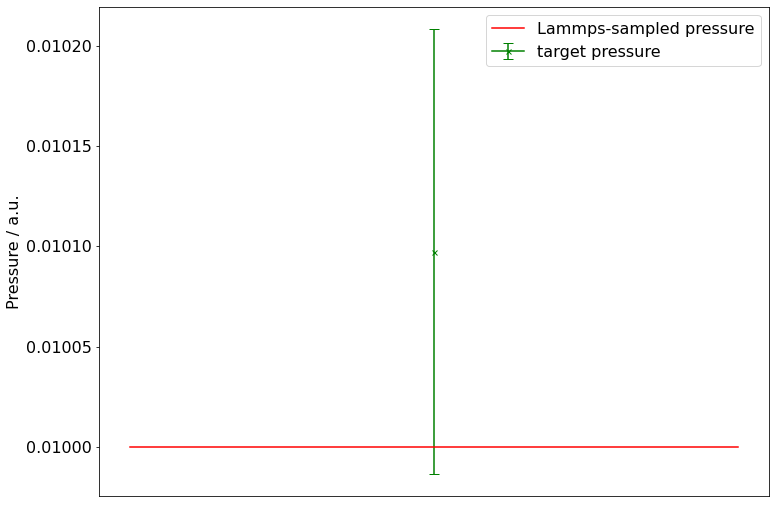

In [57]:
plt.figure(figsize=(12, 9), facecolor='white')
plt.xticks([], fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Pressure / a.u.", fontsize=16)
# plt.xticks([])
# plt.ylabel("Kinetic Energy / Hartree")
plt.plot(np.array([-0.5, 0.5]), 0.01*np.ones(2), label="Lammps-sampled pressure", color="red")
plt.errorbar(np.array([0]), Npart*data[:1000000,7].mean(), 3*errbar(Npart*data[:1000000,7]), marker="x", markersize=5.0, capsize=5.0, label="target pressure", color="green")
# plt.errorbar(np.array([0.5]), KE[5000:data1.shape[0]].mean(), 3*errbar(KE[5000:data1.shape[0]]), marker="x", markersize=5.0, capsize=5.0, label="lammps", color="blue")
plt.legend(fontsize=16)

## Distribution of kinetic energy
### demonstrating the correctness of thermostat

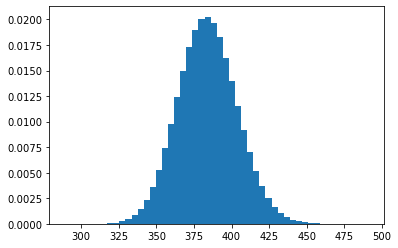

In [49]:
KEdist=plt.hist(beta*data[1001:,2]*Npart, bins=50, density=True)
dKE=KEdist[1][1]-KEdist[1][0]

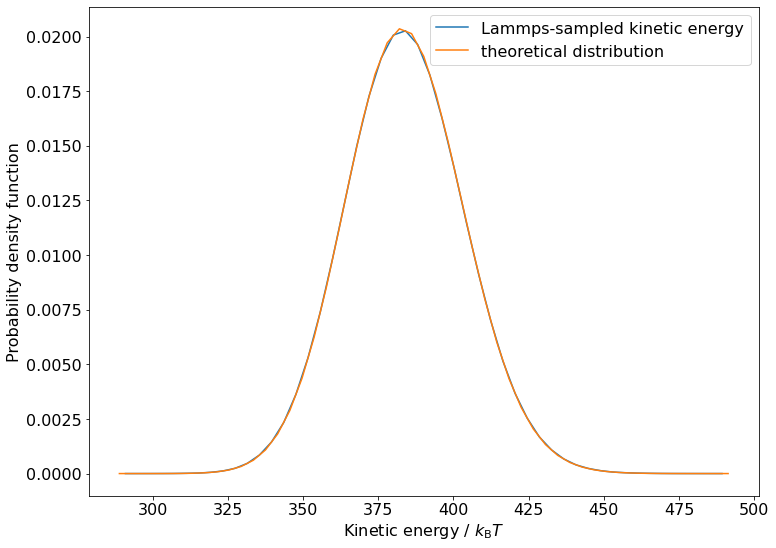

In [50]:
plt.figure(figsize=(12, 9), facecolor='white')
plt.plot(KEdist[1][1:]-0.5*dKE, KEdist[0], label="Lammps-sampled kinetic energy")
plt.plot(KEdist[1], gamma.pdf(KEdist[1], 1.5*Npart), label="theoretical distribution")
plt.xlabel("Kinetic energy / $k_{\mathrm{B}}T$", fontsize=16)
plt.ylabel("Probability density function", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## Distribution of volume
### demonstrating the correctness of barostat

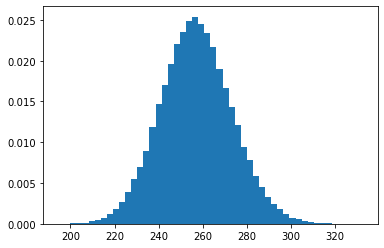

In [94]:
Vdist2=plt.hist(beta*P*data2[1000:,5], bins=50, density=True)
dV2=Vdist2[1][1]-Vdist2[1][0]

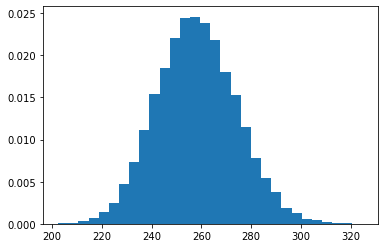

In [173]:
Vdist3=plt.hist(data3[1000:,10]*beta*P, bins=30, density=True)
dV3=Vdist3[1][1]-Vdist3[1][0]

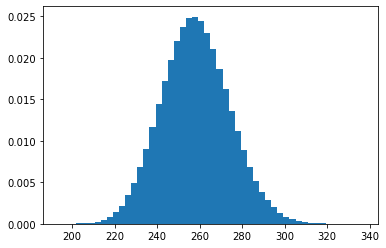

In [104]:
Vdist=plt.hist(beta*P*data[1000:,6], bins=50, density=True)
dV=Vdist[1][1]-Vdist[1][0]

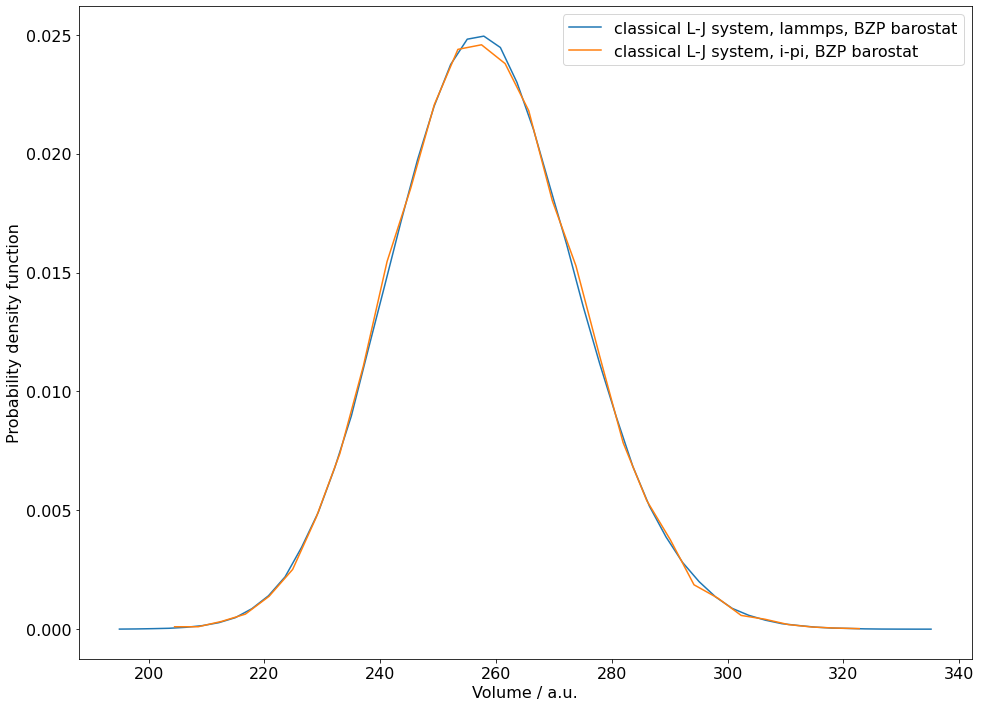

In [179]:
plt.figure(figsize=(16, 12), facecolor='white')
# plt.plot(Vdist2[1][1:]-0.5*dV2, Vdist2[0], label="classical L-J system, lammps, MTTK barostat")
plt.plot(Vdist[1][1:]-0.5*dV, Vdist[0], label="classical L-J system, lammps, BZP barostat")
plt.plot(Vdist3[1][1:]-0.5*dV3, Vdist3[0], label="classical L-J system, i-pi, BZP barostat")
# plt.plot(Vdist[1][1:], gamma.pdf(Vdist[1][1:], Npart+2), label="theoretical distribution of ideal gas", color="black")
plt.xlabel("Volume / a.u.", fontsize=16)
plt.ylabel("Probability density function", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## Pressure distribution

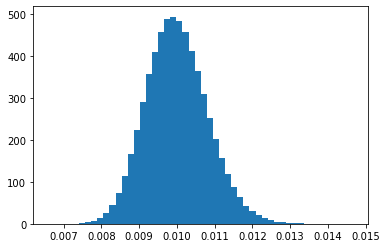

In [118]:
Pdist=plt.hist(data[1000:,7], bins=50, density=True)
dP=Pdist[1][1]-Pdist[1][0]

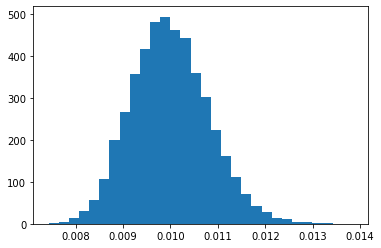

In [176]:
Pdist3=plt.hist(data3[100:,9], bins=30, density=True)
dP3=Pdist3[1][1]-Pdist3[1][0]

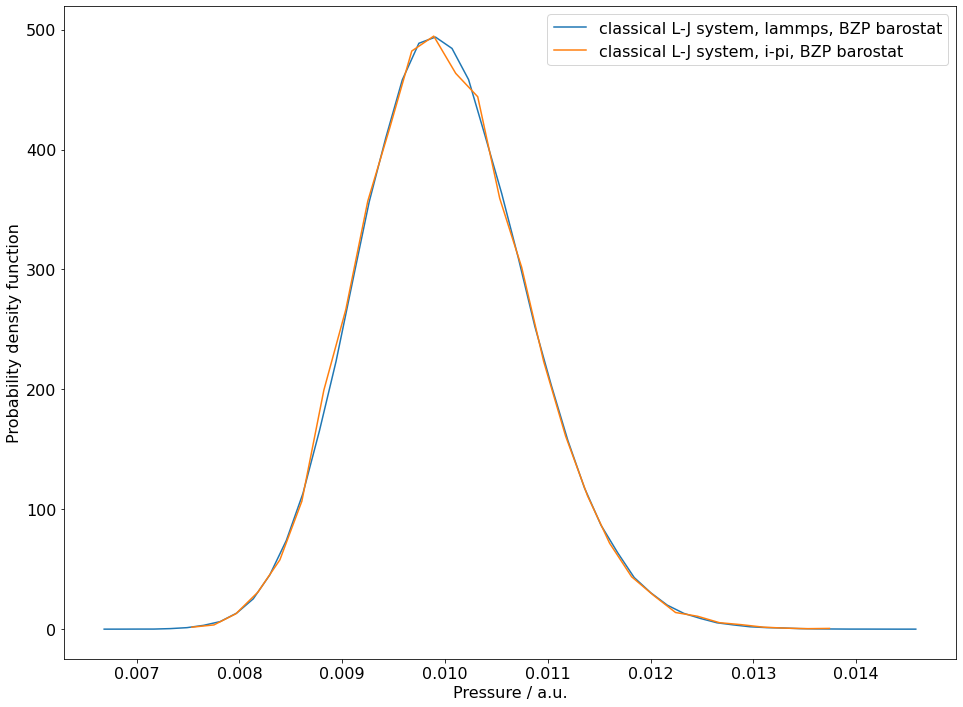

In [178]:
plt.figure(figsize=(16, 12), facecolor='white')
# plt.plot(Vdist2[1][1:]-0.5*dV2, Vdist2[0], label="classical L-J system, lammps, MTTK barostat")
plt.plot(Pdist[1][1:]-0.5*dP, Pdist[0], label="classical L-J system, lammps, BZP barostat")
plt.plot(Pdist3[1][1:]-0.5*dP3, Pdist3[0], label="classical L-J system, i-pi, BZP barostat")
# plt.plot(Vdist[1][1:], gamma.pdf(Vdist[1][1:], Npart+2), label="theoretical distribution of ideal gas", color="black")
plt.xlabel("Pressure / a.u.", fontsize=16)
plt.ylabel("Probability density function", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## Mean of pressure

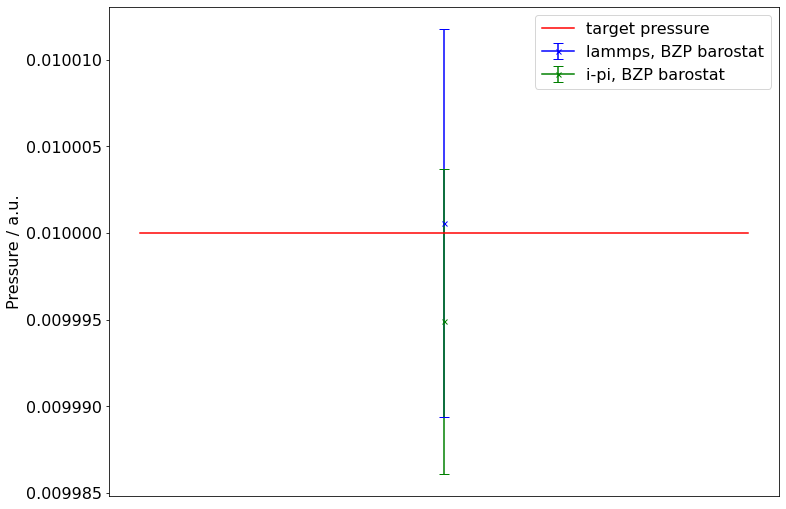

In [180]:
plt.figure(figsize=(12, 9), facecolor='white')
plt.xticks([], fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Pressure / a.u.", fontsize=16)
# plt.xticks([])
# plt.ylabel("Kinetic Energy / Hartree")
plt.plot(np.array([-0.5, 0.5]), 0.01*np.ones(2), label="target pressure", color="red")
plt.errorbar(np.array([0]), data[1000:,7].mean(), 3*errbar(data[1000:,7]), marker="x", markersize=5.0, capsize=5.0, label="lammps, BZP barostat", color="blue")
plt.errorbar(np.array([0]), data3[100:,9].mean(), 3*errbar(data3[100:,9]), marker="x", markersize=5.0, capsize=5.0, label="i-pi, BZP barostat", color="green")

# plt.errorbar(np.array([0.5]), KE[5000:data1.shape[0]].mean(), 3*errbar(KE[5000:data1.shape[0]]), marker="x", markersize=5.0, capsize=5.0, label="lammps", color="blue")
plt.legend(fontsize=16)

## Mean of volume

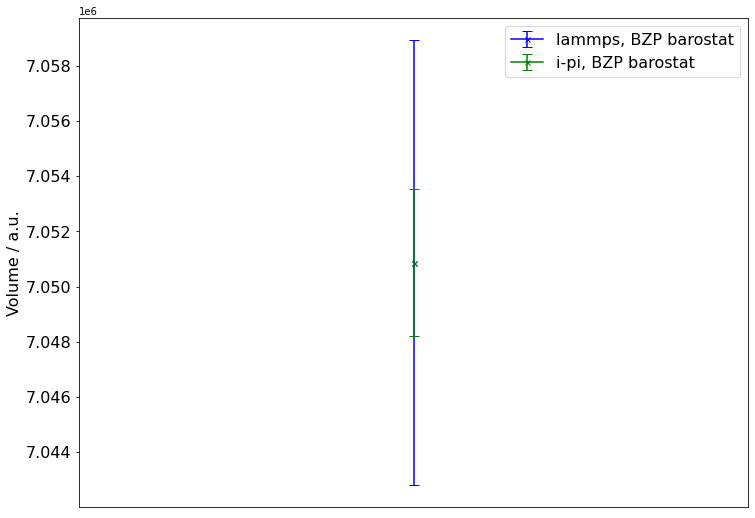

In [181]:
plt.figure(figsize=(12, 9), facecolor='white')
plt.xticks([], fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Volume / a.u.", fontsize=16)
# plt.xticks([])
# plt.ylabel("Kinetic Energy / Hartree")
# plt.plot(np.array([-0.5, 0.5]), 0.01*np.ones(2), label="Lammps-sampled pressure", color="red")
plt.errorbar(np.array([0]), data[1000:,6].mean(), 3*errbar(data[1000:,6]), marker="x", markersize=5.0, capsize=5.0, label="lammps, BZP barostat", color="blue")
plt.errorbar(np.array([0]), data3[100:,10].mean(), 3*errbar(data3[100:,10]), marker="x", markersize=5.0, capsize=5.0, label="i-pi, BZP barostat", color="green")

# plt.errorbar(np.array([0.5]), KE[5000:data1.shape[0]].mean(), 3*errbar(KE[5000:data1.shape[0]]), marker="x", markersize=5.0, capsize=5.0, label="lammps", color="blue")
plt.legend(fontsize=16)

## Distribution of potential energy

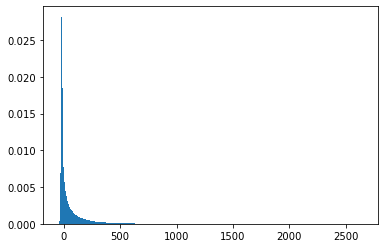

In [182]:
PEdist=plt.hist(data[10000:,4], bins=300, density=True)
dPE=PEdist[1][1]-PEdist[1][0]

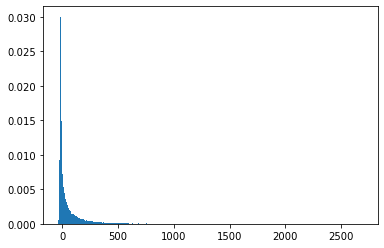

In [183]:
PEdist3=plt.hist(data3[100:,5], bins=300, density=True)
dPE3=PEdist3[1][1]-PEdist3[1][0]

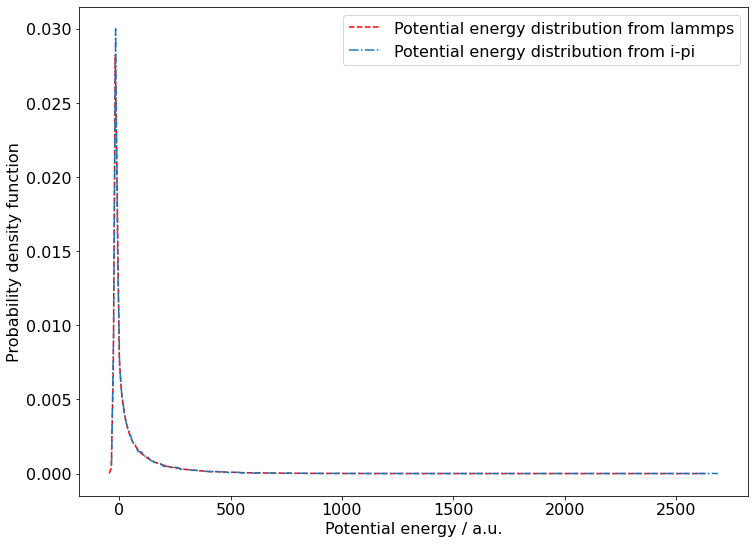

In [186]:
plt.figure(figsize=(12, 9), facecolor='white')
plt.plot(PEdist[1][1:]-0.5*dPE, PEdist[0], label="Potential energy distribution from lammps", linestyle="--", color="red")
plt.plot(PEdist3[1][1:]-0.5*dPE3, PEdist3[0], label="Potential energy distribution from i-pi", linestyle="-.")
# plt.plot(KEdist[1], gamma.pdf(KEdist[1], 256*3/2), label="theoretical distribution")
plt.xlabel("Potential energy / a.u.", fontsize=16)
plt.ylabel("Probability density function", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

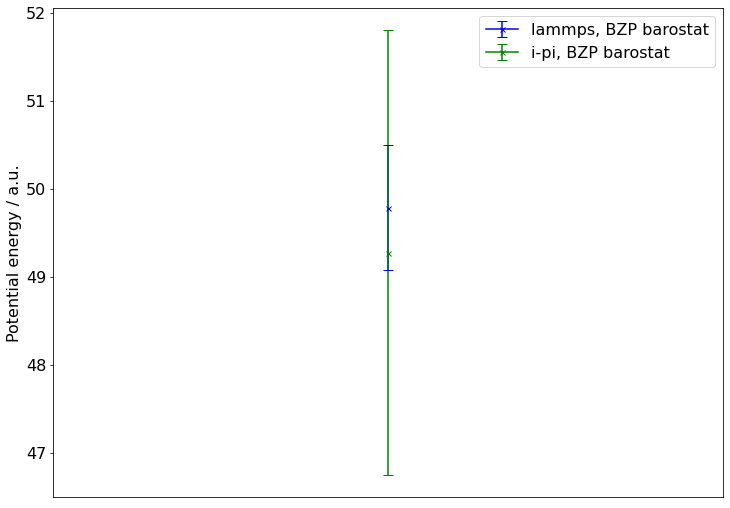

In [185]:
plt.figure(figsize=(12, 9), facecolor='white')
plt.xticks([], fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Potential energy / a.u.", fontsize=16)
# plt.xticks([])
# plt.ylabel("Kinetic Energy / Hartree")
# plt.plot(np.array([-0.5, 0.5]), 0.01*np.ones(2), label="Lammps-sampled pressure", color="red")
plt.errorbar(np.array([0]), data[1000:,4].mean(), 3*errbar(data[1000:,4]), marker="x", markersize=5.0, capsize=5.0, label="lammps, BZP barostat", color="blue")
plt.errorbar(np.array([0]), data3[100:,5].mean(), 3*errbar(data3[100:,5]), marker="x", markersize=5.0, capsize=5.0, label="i-pi, BZP barostat", color="green")

# plt.errorbar(np.array([0.5]), KE[5000:data1.shape[0]].mean(), 3*errbar(KE[5000:data1.shape[0]]), marker="x", markersize=5.0, capsize=5.0, label="lammps", color="blue")
plt.legend(fontsize=16)